## Итоговая работа по курсу «Python и математика для анализа данных»

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sts
%pylab inline
# %matplotlib inline

from scipy.stats import normaltest
from scipy.stats import anderson
# from scipy.stats import spearmanr
# from scipy.stats import kendalltau
import researchpy as rp

Populating the interactive namespace from numpy and matplotlib


**1. Загрузить файл hr.csv.**

In [4]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* **satisfaction_level** – уровень удовлетворенности
* **last_evaluation** – последняя оценка
* **number_project** – количество проектов
* **average_montly_hours** – средние часы в месяц (занятость?)
* **time_spend_company** – стаж в компании, лет
* **Work_accident** – несчастный случай на работе
* **left** – уволен
* **promotion_last_5years** – повышения за последние 5 лет
* **sales** – отдел
* **salary** – зарплата

Описание измерений датасета: http://prntscr.com/r3kbb9

In [15]:
hr.info() # пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


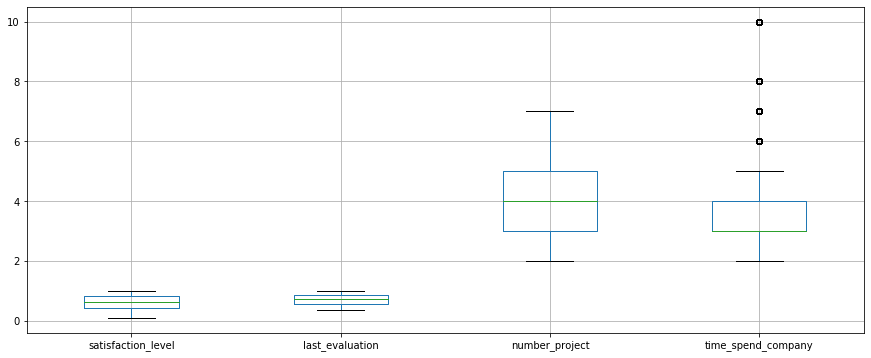

In [5]:
boxplot = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company']].boxplot(figsize=(15,6), rot=0)

In [27]:
# для переменной time_spend_company есть потенциальные выбросы - значения, находящиеся на расстоянии более 1.5 межквартильного 
# интервала от 3-го квартиля; определяем это пограничное значение:
print(hr['time_spend_company'].quantile(.75) + 1.5*(hr['time_spend_company'].quantile(.75) - hr['time_spend_company'].quantile(.25)))

5.5


In [28]:
# кол-во таких значений:
len(hr.loc[hr['time_spend_company'] > 5.5])
# но оставляем их, это - не выбросы

1282

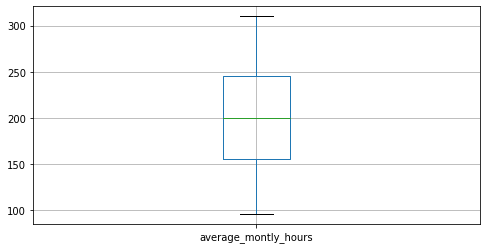

In [6]:
# переменная average_montly_hours отличается по значениям, поэтому строим отдельную диаграмму:
boxplot = hr[['average_montly_hours']].boxplot(figsize=(8,4), rot=0)

**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [30]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# уровень удовлетворенности 75% сотрудников меньше 0.82
# последняя оценка уровня удовлетворенности (last_evaluation) 75% сотрудников немного выше - 0.87 (если считать 0.82 - 
# накопленным значением)
# average_montly_hours для половины сотрудников превышает 200 часов в месяц (при 5-дневной неделе это соответствует, в среднем,
# 10 часовой занятости в день)

In [31]:
# модальные значения переменных:
hr.mode(axis=0)
# большинство сотрудников занято продажами и большинство имеют низкий уровень оплаты

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# для average_montly_hours распределение - двухмодальное (сразу можно сказать, что оно - не явл. нормальным):
hr['average_montly_hours'].value_counts().head(2)

156    153
135    153
Name: average_montly_hours, dtype: int64

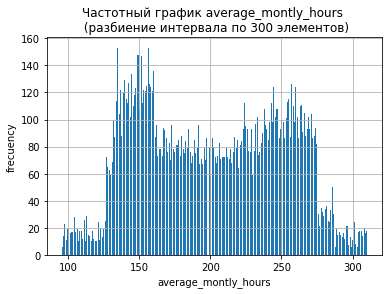

In [33]:
n, bins, patches = plt.hist(hr['average_montly_hours'], 300)

plt.xlabel('average_montly_hours')
plt.ylabel('frecuency')
plt.title('Частотный график average_montly_hours \n (разбиение интервала по 300 элементов)')
plt.grid(True)
plt.show()

**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

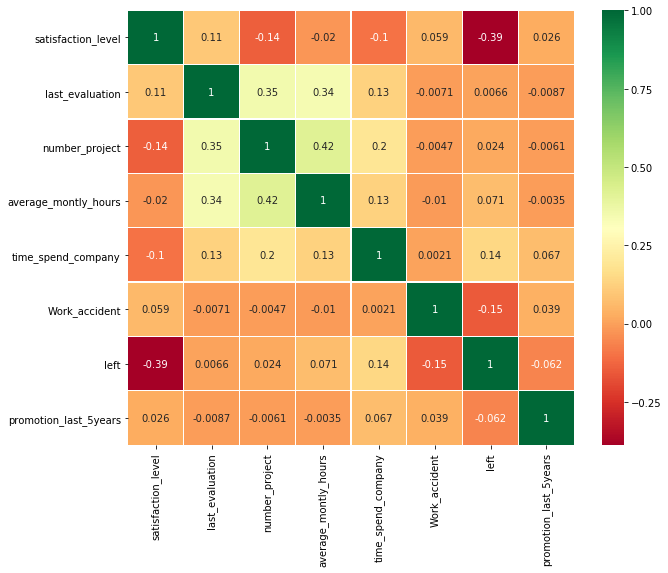

In [35]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf() # gcf() - получение текущей фигуры
fig.set_size_inches(10,8) # set_size_inches() - установить размер фигуры
plt.show()

In [36]:
# из всех переменных наиболее сильная корреляция - между satisfaction_level и left, эта зависимость - обратная,
# коэффициент корреляции: -0.39

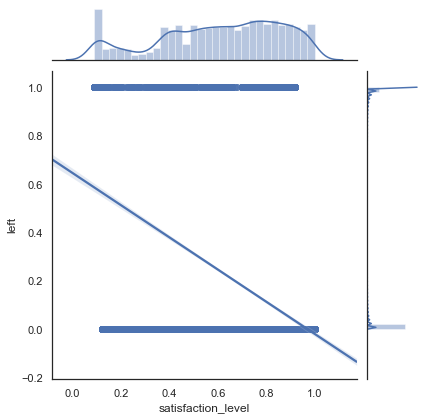

In [38]:
satisfaction_level = hr['satisfaction_level']
left = hr['left']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=satisfaction_level, y=left, data=hr, kind='reg')
plt.show()

**4. Визуализировать несколько взаимосвязей между переменными.**

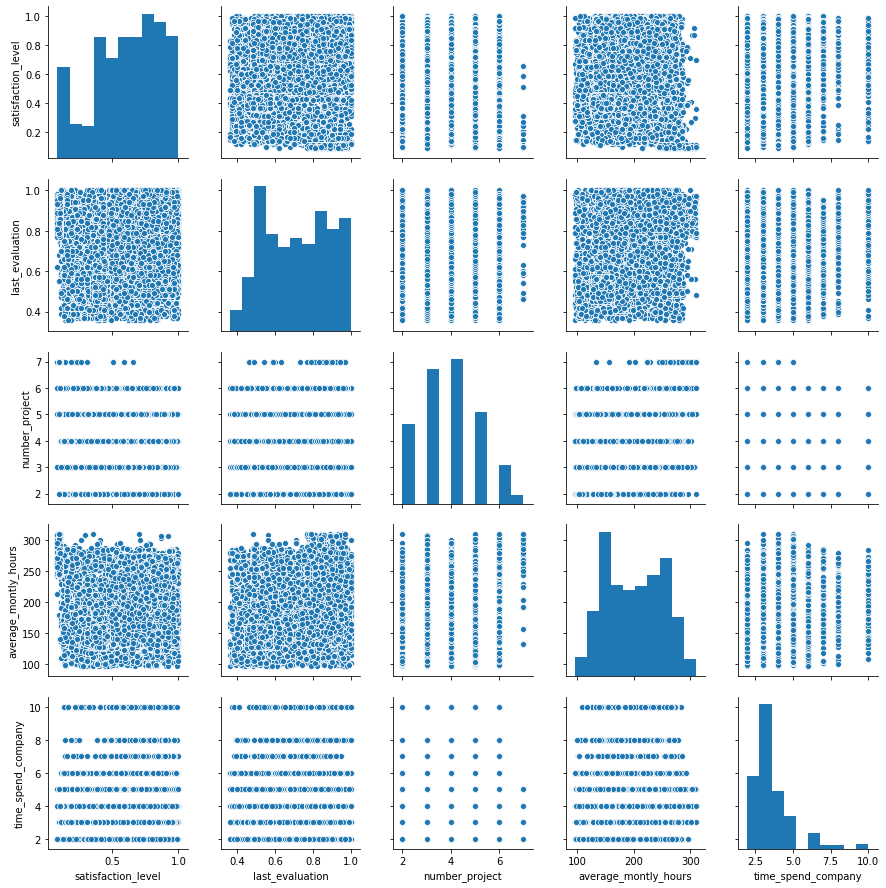

In [37]:
sns_plot = sns.pairplot(hr.iloc[:, 0:5]) # на основе каких столбцов строим
# sns_plot = sns.pairplot(hr)
sns_plot
# исключили из визуализации категориальные переменные (sales, salary) и переменные, имеющие распределение Бернулли 
# (Work_accident, left, promotion_last_5years)

In [ ]:
# также можно построить boxplot-диаграммы, которые иллюстрируют разницу между ушедшими из компании и продолжающими работать
# или разницу между сотрудниками департаментов компании

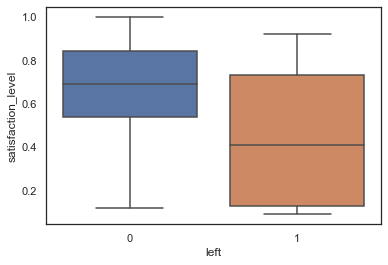

In [39]:
# например, уровень удовлетворенности ушедших в среднем ниже, чем у продолжающих работать: 
plt.rcParams['figure.figsize']=(6,4)
ax = sns.boxplot(x='left', y='satisfaction_level', data=hr)

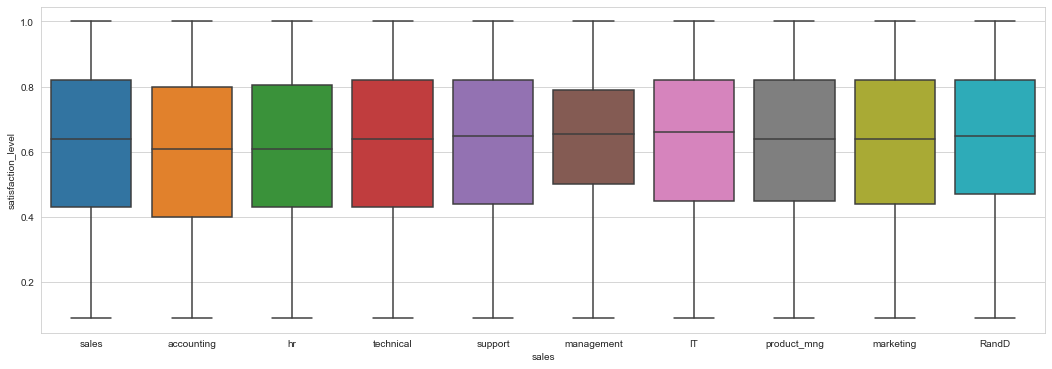

In [45]:
# в среднем, удовлетворенность сотрудников департаментов hr и accounting ниже сотрудников остальных департаментов:
plt.rcParams['figure.figsize']=(18,6)
ax = sns.boxplot(x='sales', y='satisfaction_level', data=hr)

In [46]:
# hr.groupby('sales')['satisfaction_level'].describe()

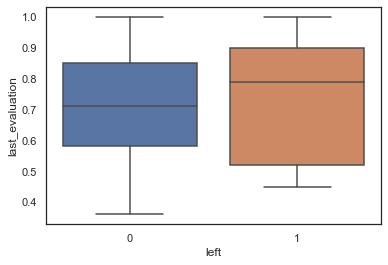

In [40]:
plt.rcParams['figure.figsize']=(6,4)
ax = sns.boxplot(x='left', y='last_evaluation', data=hr)

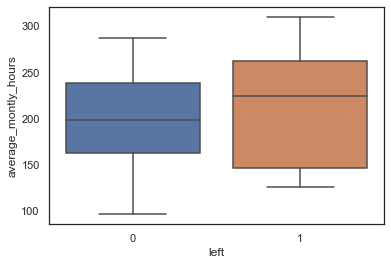

In [41]:
plt.rcParams['figure.figsize']=(6,4)
ax = sns.boxplot(x='left', y='average_montly_hours', data=hr)

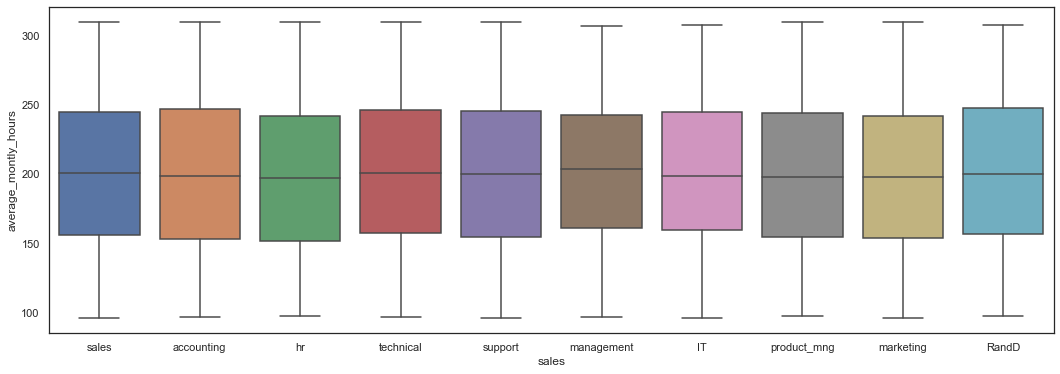

In [50]:
plt.rcParams['figure.figsize']=(18,6)
ax = sns.boxplot(x='sales', y='average_montly_hours', data=hr)

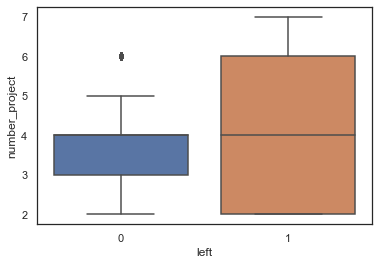

In [42]:
plt.rcParams['figure.figsize']=(6,4)
ax = sns.boxplot(x='left', y='number_project', data=hr)

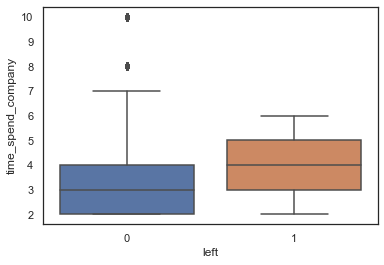

In [44]:
plt.rcParams['figure.figsize']=(6,4)
ax = sns.boxplot(x='left', y='time_spend_company', data=hr)

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

 #### satisfaction_level, last_evaluation

In [8]:
# для начала можем визуально сравнить гистограммы и средние значения переменных
x = hr['satisfaction_level']
y = hr['last_evaluation']
x.name, y.name = 'satisfaction_level', 'last_evaluation'

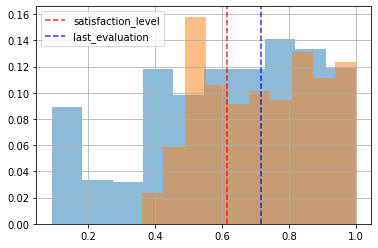

In [9]:
# гистограммы отличается друг от друга, а также от гистограммы нормального распределения 
# средние значения выборок различаются, значимо ли это различие статистически покажет тест
def two_histograms(x,y):
    x.hist(alpha=0.5, weights = [1./len(x)]*len(x))
    y.hist(alpha=0.5, weights = [1./len(y)]*len(y))
    plt.axvline(x.mean(), color = 'red', alpha=0.8, linestyle = 'dashed')
    plt.axvline(y.mean(), color = 'blue', alpha=0.8, linestyle = 'dashed')
    plt.legend([x.name, y.name])
two_histograms(x,y)

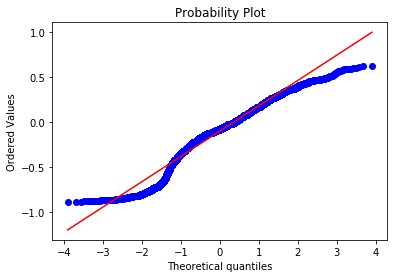

In [20]:
# дополнительно построим Q-Q plot (выборки - парные или связанные)
sts.probplot(hr['satisfaction_level'] - hr['last_evaluation'], dist = 'norm', plot = pylab)
pylab.show()
# pylab.figure(figsize=(12,4))
# pylab.subplot(1,2,1)
# sts.probplot(hr['satisfaction_level'], dist = 'norm', plot = pylab)
# pylab.subplot(1,2,2)
# sts.probplot(hr['last_evaluation'], dist = 'norm', plot = pylab)
# pylab.show()

In [ ]:
# отклонения от прямой свидетельствуют, что распределение попарных разностей, скорее всего, отличается от нормального.
# результаты тестов по критериям Д'Агостино, Андерсона-Дарлинга подтверждают это предположение (тест Шапиро-Уилка не используем,
# его не рекомендуют использовать для выборок более 5000 наблюдений):

In [51]:
# критерий Д'Агостино для satisfaction_level
stat, p = normaltest(hr['satisfaction_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=1200.958, p=0.000
Probably not Gaussian


In [10]:
# критерий Андерсона-Дарлинга для satisfaction_level
result = anderson(hr['satisfaction_level'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the alpha level = %.1f%%' % (sl))
    else:
        print('Probably not Gaussian at the alpha level = %.1f%%' % (sl))

stat=168.365
Probably not Gaussian at the alpha level = 15.0%
Probably not Gaussian at the alpha level = 10.0%
Probably not Gaussian at the alpha level = 5.0%
Probably not Gaussian at the alpha level = 2.5%
Probably not Gaussian at the alpha level = 1.0%


In [13]:
# критерий Д'Агостино для last_evaluation
stat, p = normaltest(hr['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=19704.807, p=0.000
Probably not Gaussian


In [14]:
# критерий Андерсона-Дарлинга для last_evaluation
result = anderson(hr['last_evaluation'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the alpha level = %.1f%%' % (sl))
    else:
        print('Probably not Gaussian at the alpha level = %.1f%%' % (sl))

stat=221.123
Probably not Gaussian at the alpha level = 15.0%
Probably not Gaussian at the alpha level = 10.0%
Probably not Gaussian at the alpha level = 5.0%
Probably not Gaussian at the alpha level = 2.5%
Probably not Gaussian at the alpha level = 1.0%


In [ ]:
# тем не меннее, для проверки значимости различия срдених значений можем воспользоваться параметрическим критерием Стьюдента, 
# допуская, что распределения переменных отличаются от нормального несущественно, тем более, что размеры выборок достаточно 
# большие, а с увеличением выборки отклонения от нормальности в распределении данных менее значимы

In [12]:
descriptives, results = rp.ttest(hr['satisfaction_level'], hr['last_evaluation'], paired = True) # парные выборки
descriptives # сводная статистика

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,last_evaluation,14999.0,0.716102,0.171169,0.001398,0.713362,0.718841
2,diff,14999.0,-0.103268,0.286665,0.002341,-0.107856,-0.098680


In [11]:
results # результаты теста

,Paired samples t-test,results
0,Difference (satisfaction_level - last_evaluati...,-0.1033
1,Degrees of freedom =,14998.0000
2,t =,-44.1187
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3602
7,Hedge's g =,-0.3602
8,Glass's delta =,-0.4153
9,r =,0.3389


In [ ]:
# среднее значение satisfaction_level (0.61) меньше и имеет больший разброс значений (0.25)
# имеется статистически значимое различие между средними значениями satisfaction_level и last_evaluation 
# (t(14998) = -44.12, р < 0.05, r = 0.34)

In [ ]:
# для остальных переменных также пользуемся указанным допущением и применяем критерий Стьюдента:

 #### satisfaction_level, promotion_last_5years

In [16]:
descriptives, results = rp.ttest(hr['satisfaction_level'], hr['promotion_last_5years'], paired = True)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,promotion_last_5years,14999.0,0.021268,0.144281,0.001178,0.018959,0.023577
2,diff,14999.0,0.591565,0.284249,0.002321,0.587016,0.596115


In [17]:
results

,Paired samples t-test,results
0,Difference (satisfaction_level - promotion_las...,0.5916
1,Degrees of freedom =,14998.0000
2,t =,254.8799
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,2.0812
7,Hedge's g =,2.0811
8,Glass's delta =,2.3793
9,r =,0.9014


In [ ]:
# р-value < 0.05, значит имеется статистически значимое различие между средними значениями переменных

 #### satisfaction_level, average_montly_hours

In [21]:
descriptives, results = rp.ttest(hr['satisfaction_level'], hr['average_montly_hours'], paired = True)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,average_montly_hours,14999.0,201.050337,49.943099,0.407797,200.251004,201.849669
2,diff,14999.0,-200.437503,49.948703,0.407843,-201.236925,-199.638081


In [22]:
results

,Paired samples t-test,results
0,Difference (satisfaction_level - average_montl...,-200.4375
1,Degrees of freedom =,14998.0000
2,t =,-491.4575
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-4.0129
7,Hedge's g =,-4.0128
8,Glass's delta =,-806.1657
9,r =,0.9703


In [ ]:
# р-value < 0.05, значит имеется статистически значимое различие между средними значениями переменных

 #### satisfaction_level, number_project

In [24]:
descriptives, results = rp.ttest(hr['satisfaction_level'], hr['number_project'], paired = True)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,number_project,14999.0,3.803054,1.232592,0.010064,3.783326,3.822781
2,diff,14999.0,-3.190220,1.291793,0.010548,-3.210895,-3.169545


In [25]:
results

,Paired samples t-test,results
0,Difference (satisfaction_level - number_projec...,-3.1902
1,Degrees of freedom =,14998.0000
2,t =,-302.4536
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-2.4696
7,Hedge's g =,-2.4695
8,Glass's delta =,-12.8312
9,r =,0.9269


In [ ]:
# р-value < 0.05, значит имеется статистически значимое различие между средними значениями переменных

**6. Рассчитать сколько работников работает в каждом департаменте.**

In [17]:
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
employees = hr[hr.left == 0]
print('Кол-во работающих сотрудников:', "%.0f" % len(employees))

Кол-во работающих сотрудников: 11428


In [21]:
print('Кол-во работающих сотрудников по департаментам:')
employees.sales.value_counts()

Кол-во работающих сотрудников по департаментам:


sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

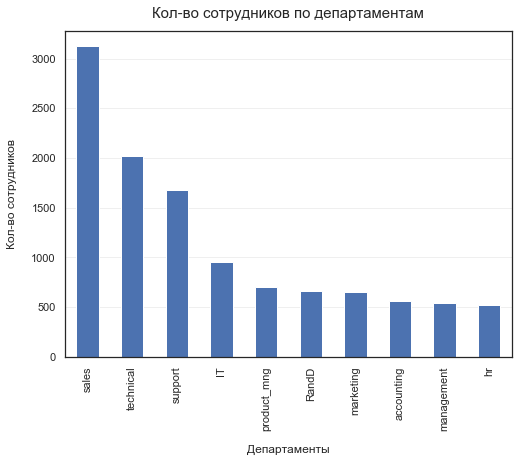

In [66]:
employees.sales.value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Департаменты', labelpad=14)
plt.ylabel('Кол-во сотрудников', labelpad=14)
plt.title('Кол-во сотрудников по департаментам', fontdict={'size':15}, y=1.02)
plt.grid(axis = 'y', alpha=0.3)

In [7]:
# то же самое, в процентах:
employees.sales.value_counts(normalize=True)*100

sales          27.353868
technical      17.702135
support        14.648232
IT              8.347917
product_mng     6.160308
RandD           5.827791
marketing       5.731537
accounting      4.926496
management      4.716486
hr              4.585229
Name: sales, dtype: float64

In [32]:
# можно дополнительно посмотреть уровень удовлетворенности сотрудников по департаментам
hr[ hr.left == 0 ].groupby('sales')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
sales,,,,,,,,
IT,954.0,0.677170,0.209040,0.12,0.55,0.70,0.840,1.0
RandD,666.0,0.653799,0.221831,0.12,0.52,0.68,0.830,1.0
accounting,563.0,0.647211,0.221350,0.12,0.51,0.67,0.820,1.0
hr,524.0,0.666679,0.216091,0.13,0.53,0.67,0.840,1.0
management,539.0,0.654861,0.201581,0.12,0.54,0.68,0.800,1.0
marketing,655.0,0.669878,0.218826,0.12,0.54,0.69,0.845,1.0
product_mng,704.0,0.658466,0.220944,0.13,0.52,0.67,0.840,1.0
sales,3126.0,0.668548,0.222123,0.12,0.54,0.69,0.850,1.0
support,1674.0,0.673799,0.213199,0.12,0.54,0.69,0.840,1.0


**7. Показать распределение сотрудников по зарплатам.**

In [18]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [23]:
print('Уровень оплаты сотрудников:')
employees.salary.value_counts()

Уровень оплаты сотрудников:


low       5144
medium    5129
high      1155
Name: salary, dtype: int64

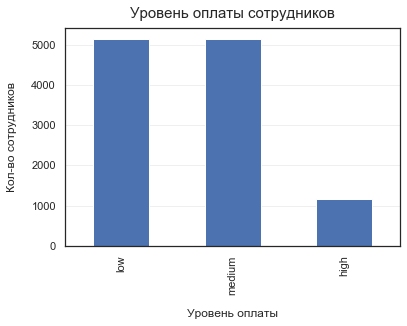

In [67]:
employees.salary.value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('Уровень оплаты', labelpad=14)
plt.ylabel('Кол-во сотрудников', labelpad=14)
plt.title('Уровень оплаты сотрудников', fontdict={'size':15}, y=1.02)
plt.grid(axis = 'y', alpha=0.3)

In [52]:
# employees.salary.value_counts().plot(kind='pie', subplots=True, figsize=(6, 6))
# plt.title('Распределение сотрудников по уровню оплаты')
# plt.ylabel('')
# plt.show()

In [60]:
# то же самое, в процентах:
employees.salary.value_counts(normalize=True)*100

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64

**8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

In [8]:
print('Распределение сотрудников департаментов по оплате:')
employees.pivot_table(index = 'sales', columns = 'salary', values = 'left', aggfunc = 'count', fill_value = 0, 
                    margins = True)

Распределение сотрудников департаментов по оплате:


salary,high,low,medium,All
sales,,,,
IT,79,437,438,954
RandD,47,309,310,666
accounting,69,259,235,563
hr,39,243,242,524
management,224,121,194,539
marketing,71,276,308,655
product_mng,62,346,296,704
sales,255,1402,1469,3126
support,133,757,784,1674


**9. Сколько сотрудников покинули компанию.**

In [67]:
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [28]:
print('Кол-во сотрудников, покинувших компанию:')
hr.loc[hr.left == 1].sales.count()

Кол-во сотрудников, покинувших компанию:


3571

In [30]:
print('Кол-во сотрудников департаментов, покинувших компанию:')
hr[ hr.left == 1 ].sales.value_counts()

Кол-во сотрудников департаментов, покинувших компанию:


sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

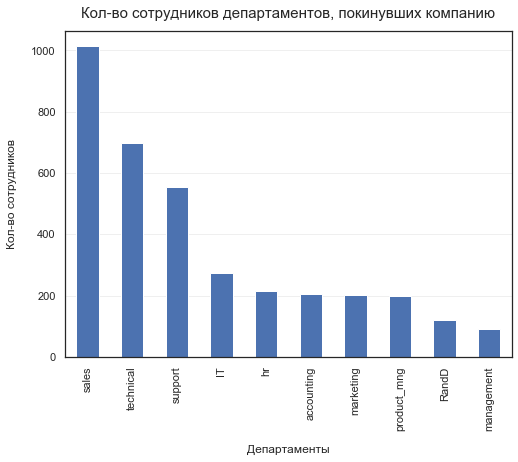

In [68]:
hr[ hr.left == 1 ].sales.value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Департаменты', labelpad=14)
plt.ylabel('Кол-во сотрудников', labelpad=14)
plt.title('Кол-во сотрудников департаментов, покинувших компанию', fontdict={'size':15}, y=1.02)
plt.grid(axis = 'y', alpha=0.3)

In [55]:
print('Уровень оплаты сотрудников, покинувших компанию:')
hr[ hr.left == 1 ].salary.value_counts()

Уровень оплаты сотрудников, покинувших компанию:


low       2172
medium    1317
high        82
Name: salary, dtype: int64

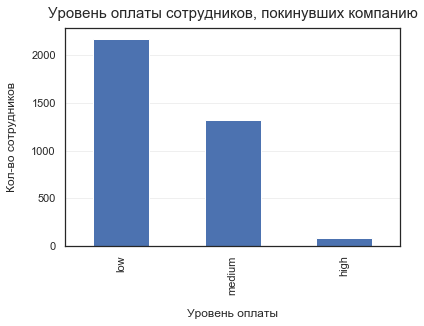

In [70]:
hr[ hr.left == 1 ].salary.value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('Уровень оплаты', labelpad=14)
plt.ylabel('Кол-во сотрудников', labelpad=14)
plt.title('Уровень оплаты сотрудников, покинувших компанию', fontdict={'size':15}, y=1.02)
plt.grid(axis = 'y', alpha=0.3)

**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

In [47]:
# Выше было показано, что сотрудники, покинувшие компанию, в среднем характеризуются более низким уровнем удовлетворенности 
# и большей занятостью.
# Большинство из них имело низкий уровень оплаты труда.

In [99]:
# Тестируем гипотезу, что ушедшие из компании сотрудники и продолжающие работать в ней не отличаются по уровню удовлетворенности
retired = hr[hr['left']== 1]['satisfaction_level']
employees = hr[hr['left']== 0]['satisfaction_level']
descriptives, results = rp.ttest(retired, employees)
print(descriptives)
print('_______________________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
1  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.448758  
1  0.670790  
2  0.616813  
_______________________________________
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...     -0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =     -51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.9895
7                                       Hedge's g =      -0.9894
8                 

In [ ]:
# значение показателя p-value меньше 0.05, отвергаем нулевую гипотезу: ушедшие из компании сотрудники и продолжающие работать 
# в ней отличаются по уровню удовлетворенности

In [100]:
# выборки значительно различаются по численности, сравниваем одинаковые по численности подвыборки
retired = retired.sample(3500)
employees = employees.sample(3500)

In [101]:
statistics.variance(retired), statistics.variance(employees)

(0.06969350206997918, 0.04790894675213326)

In [102]:
# учитывает разницу дисперсий:
sts.ttest_ind(retired, employees, equal_var=False)

Ttest_indResult(statistic=-38.436744371161716, pvalue=1.5440058073427569e-292)

In [ ]:
# результат - тот же

In [56]:
# Тестируем гипотезу, что ушедшие из компании сотрудники и продолжающие работать в ней не отличаются по уровню загрузки

In [53]:
retired_ = hr[hr['left']== 1]['average_montly_hours'].sample(3500)
employees_ = hr[hr['left']== 0]['average_montly_hours'].sample(3500)

In [54]:
statistics.variance(retired_), statistics.variance(employees_)

(3734.418318621647, 2060.3388073327073)

In [55]:
sts.ttest_ind(retired_, employees_, equal_var=False)

Ttest_indResult(statistic=6.246897857945587, pvalue=4.453253083835378e-10)

In [ ]:
# значение показателя p-value меньше 0.05, отвергаем нулевую гипотезу

In [62]:
# Тестируем гипотезу, что ушедшие из компании сотрудники и продолжающие работать в ней не отличаются по кол-ву проектов

In [57]:
retired_ = hr[hr['left']== 1]['number_project'].sample(3500)
employees_ = hr[hr['left']== 0]['number_project'].sample(3500)

In [58]:
statistics.variance(retired_), statistics.variance(employees_)

(3.3072303107010166, 0.958378230514841)

In [59]:
sts.ttest_ind(retired_, employees_, equal_var=False)

Ttest_indResult(statistic=1.5304427405333407, pvalue=0.12596608109473004)

In [60]:
# значение показателя p-value больше 0.05, гипотеза о равенстве средних справедлива

In [61]:
np.mean(retired_), np.mean(employees_)

(3.8565714285714288, 3.803142857142857)

In [67]:
# Тестируем гипотезу, что ушедшие из компании сотрудники и продолжающие работать в ней не отличаются по продвижению

In [63]:
retired_ = hr[hr['left']== 1]['promotion_last_5years'].sample(3500)
employees_ = hr[hr['left']== 0]['promotion_last_5years'].sample(3500)

In [64]:
statistics.variance(retired_), statistics.variance(employees_)

(0.005400645082268403, 0.02533123749642755)

In [65]:
sts.ttest_ind(retired_, employees_, equal_var=False)

Ttest_indResult(statistic=-6.9423082263492955, pvalue=4.357720792684834e-12)

In [66]:
# значение показателя p-value меньше 0.05, отвергаем нулевую гипотезу

In [72]:
# Тестируем гипотезу, что ушедшие из компании сотрудники и продолжающие работать в ней не отличаются по продвижению

In [68]:
retired_ = hr[hr['left']== 1]['time_spend_company'].sample(3500)
employees_ = hr[hr['left']== 0]['time_spend_company'].sample(3500)

In [69]:
statistics.variance(retired_), statistics.variance(employees_)

(0.9558207651165639, 2.410231413056792)

In [70]:
sts.ttest_ind(retired_, employees_, equal_var=False)

Ttest_indResult(statistic=16.307178395597695, pvalue=1.647946859035222e-58)

In [ ]:
# значение показателя p-value меньше 0.05, отвергаем нулевую гипотезу